In [1]:
from mongo_connection import Mongo_connection
import numpy as np
import pandas as pd
import itertools
import pair_transition_analysis
import granger_causation_test
from matplotlib import pyplot as plt
from collections import defaultdict
import roi_config
import fixation
import hypothesis_testing
import bulk_run
import anova
import re
import utils

[INFO] Created a mongodb instance.
[INFO] Currently connected to eye_tracking_db/fixation_sequences.
[INFO] Found 49 documents.


In [4]:
mongo = Mongo_connection()
mongo.connect()

[INFO] Created a mongodb instance.
[INFO] Currently connected to eye_tracking_db/fixation_sequences.
[INFO] Found 49 documents.


In [3]:
df_dwell = bulk_run.run_dwell_stats({})

trial: 1, group: 2, pID: 001
trial: 1, group: 2, pID: 002
trial: 1, group: 1, pID: 003
trial: 1, group: 1, pID: 004
trial: 1, group: 2, pID: 005
trial: 1, group: 2, pID: 006
trial: 1, group: 1, pID: 007
trial: 1, group: 1, pID: 008
trial: 1, group: 1, pID: 010
trial: 1, group: 2, pID: 011
trial: 1, group: 2, pID: 014
trial: 1, group: 2, pID: 016
trial: 1, group: 2, pID: 019
trial: 1, group: 2, pID: 020
trial: 1, group: 2, pID: 021
trial: 1, group: 2, pID: 022
trial: 1, group: 1, pID: 023
trial: 1, group: 2, pID: 025
trial: 1, group: 1, pID: 027
trial: 1, group: 1, pID: 029
trial: 1, group: 1, pID: 032
trial: 2, group: 2, pID: 001
trial: 2, group: 2, pID: 002
trial: 2, group: 1, pID: 003
trial: 2, group: 1, pID: 004
trial: 2, group: 2, pID: 005
trial: 2, group: 2, pID: 006
trial: 2, group: 1, pID: 007
trial: 2, group: 1, pID: 008
trial: 2, group: 1, pID: 010
trial: 2, group: 2, pID: 011
trial: 2, group: 2, pID: 014
trial: 2, group: 2, pID: 016
trial: 2, group: 2, pID: 019
trial: 2, grou

In [4]:
df_dwell

,pID,group,trial,rating,null_percent,duration_asi,duration_percentage_asi,duration_average_asi,fix_rate_asi,duration_alt,...,duration_average_alt,fix_rate_alt,duration_runway,duration_percentage_runway,duration_average_runway,fix_rate_runway,duration_unknown,duration_percentage_unknown,duration_average_unknown,fix_rate_unknown
0,001,2,1,1,0.102396,28.092131,0.272824,0.826239,3.753090,10.171420,...,0.782417,1.435005,62.794360,0.609843,1.610112,4.305015,1.910151,0.018551,0.382030,0.551925
1,001,2,2,1,0.102396,28.092131,0.272824,0.826239,3.753090,10.171420,...,0.782417,1.435005,62.794360,0.609843,1.610112,4.305015,1.910151,0.018551,0.382030,0.551925
2,002,2,1,1,0.035388,15.524499,0.138675,0.862472,2.013577,15.922682,...,0.796134,2.237308,74.411603,0.664691,1.814917,4.586481,6.090378,0.054403,2.030126,0.335596
3,002,2,2,1,0.035388,15.524499,0.138675,0.862472,2.013577,15.922682,...,0.796134,2.237308,74.411603,0.664691,1.814917,4.586481,6.090378,0.054403,2.030126,0.335596
4,003,1,1,0,0.066433,21.158025,0.181800,1.322377,1.801966,13.179844,...,0.775285,1.914588,79.579073,0.683780,3.060734,2.928194,2.464140,0.021173,0.821380,0.337869
5,003,1,2,0,0.066433,21.158025,0.181800,1.322377,1.801966,13.179844,...,0.775285,1.914588,79.579073,0.683780,3.060734,2.928194,2.464140,0.021173,0.821380,0.337869
6,004,1,1,0,0.055227,23.143323,0.217613,1.006231,2.538872,25.790483,...,0.805953,3.532343,55.635053,0.523127,1.685911,3.642729,1.782045,0.016756,0.594015,0.331157
7,004,1,2,0,0.055227,23.143323,0.217613,1.006231,2.538872,25.790483,...,0.805953,3.532343,55.635053,0.523127,1.685911,3.642729,1.782045,0.016756,0.594015,0.331157
8,005,2,1,1,0.107272,15.527796,0.155834,0.817252,2.278520,13.071624,...,0.933687,1.678910,56.020261,0.562207,2.074824,3.237897,15.023760,0.150775,0.938985,1.918754
9,005,2,2,1,0.107272,15.527796,0.155834,0.817252,2.278520,13.071624,...,0.933687,1.678910,56.020261,0.562207,2.074824,3.237897,15.023760,0.150775,0.938985,1.918754


In [5]:
exclude_cols = ["index", "pID", "group", "trial", "null_percent", "rating"]
cols = [c for c in list(df_dwell.columns) if c not in exclude_cols]

df_1 = df_dwell[df_dwell["rating"] == 0].loc[:,cols]
df_2 = df_dwell[df_dwell["rating"] == 1].loc[:,cols]

In [6]:
hypothesis_testing.hypothesis_test([df_1, df_2])

Found 2 groups
Number of samples in group 0:22
Number of samples in group 1:20
duration_asi: group 1: 22, group 2: 20
duration_percentage_asi: group 1: 22, group 2: 20
duration_average_asi: group 1: 22, group 2: 20
fix_rate_asi: group 1: 22, group 2: 20
duration_alt: group 1: 22, group 2: 20
duration_percentage_alt: group 1: 22, group 2: 20
duration_average_alt: group 1: 22, group 2: 20
fix_rate_alt: group 1: 22, group 2: 20
duration_runway: group 1: 22, group 2: 20
duration_percentage_runway: group 1: 22, group 2: 20
duration_average_runway: group 1: 22, group 2: 20
fix_rate_runway: group 1: 22, group 2: 20
duration_unknown: group 1: 22, group 2: 20
duration_percentage_unknown: group 1: 22, group 2: 20
duration_average_unknown: group 1: 22, group 2: 20
fix_rate_unknown: group 1: 22, group 2: 20
test: t, effect size: cohen


,ROI,levene: l-value,levene: p-value,t: t-value,t: p-value,ES (cohen)
0,duration_asi,0.240764,0.626336,-1.902709,0.064294,0.587856
1,duration_percentage_asi,0.286568,0.595392,-2.494858,0.016829,0.770804
2,duration_average_asi,0.538345,0.467399,-0.173229,0.863345,0.053520
3,fix_rate_asi,1.343169,0.253348,-2.588647,0.013369,0.799781
4,duration_alt,2.436474,0.126420,1.463803,0.151063,0.452252
5,duration_percentage_alt,0.012681,0.910902,0.277845,0.782563,0.085842
6,duration_average_alt,7.187903,0.010611,1.468198,0.149871,0.453610
7,fix_rate_alt,0.773028,0.384533,0.394838,0.695060,0.121988
8,duration_runway,0.023337,0.879351,1.358839,0.181811,0.419823
9,duration_percentage_runway,0.302491,0.585383,0.748782,0.458370,0.231341


In [5]:
df_basic_metrics = bulk_run.run_basic_metrics(trial=2)

trial: 2, group: 2, pID: 001
trial: 2, group: 2, pID: 002
trial: 2, group: 1, pID: 003
trial: 2, group: 1, pID: 004
trial: 2, group: 2, pID: 005
trial: 2, group: 2, pID: 006
trial: 2, group: 1, pID: 007
trial: 2, group: 1, pID: 008
trial: 2, group: 2, pID: 009
trial: 2, group: 1, pID: 010
trial: 2, group: 2, pID: 011
trial: 2, group: 2, pID: 014
trial: 2, group: 2, pID: 015


D:\workspace\eye-tracking-in-aviation\bulk_run.py:47: RuntimeWarning: divide by zero encountered in log2
  Ht += -sum(pA[k]*(np.nan_to_num(m[k]*np.log2(m[k]))))
D:\workspace\eye-tracking-in-aviation\bulk_run.py:47: RuntimeWarning: invalid value encountered in multiply
  Ht += -sum(pA[k]*(np.nan_to_num(m[k]*np.log2(m[k]))))


trial: 2, group: 2, pID: 016
trial: 2, group: 2, pID: 017
trial: 2, group: 2, pID: 019
trial: 2, group: 2, pID: 020
trial: 2, group: 2, pID: 021
trial: 2, group: 2, pID: 022
trial: 2, group: 1, pID: 023
trial: 2, group: 2, pID: 025
trial: 2, group: 1, pID: 027
trial: 2, group: 1, pID: 029
trial: 2, group: 1, pID: 032


In [13]:
df_x = df_dwell[["group", "fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]]
g1 = df_x[df_x["group"] == 0]
g2 = df_x[df_x["group"] == 1]
v1 = g1[["fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]].values.reshape(-1)
v2 = g2[["fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]].values.reshape(-1)
print("group1", v1.mean(), np.std(v1))
print("group2", v2.mean(), np.std(v2))

group1 3.101454459963737 2.015926489618746
group2 3.0567001180722038 2.052995490769784


In [14]:
hypothesis_testing.hypothesis_test_group(df_dwell, trial = 2)

test between group 1 and group 2 in trial 2
Number of samples in group 0: 7
Number of samples in group 1: 17
test: t, effect size: cohen


,ROI,levene: l-value,levene: p-value,t: t-value,t: p-value,ES (cohen)
0,duration_rpmleft,0.384375,0.541640,-0.549109,0.588461,0.246599
1,duration_percentage_rpmleft,0.625940,0.437296,-0.710242,0.485016,0.318961
2,duration_average_rpmleft,0.983467,0.332127,-0.490306,0.628771,0.220191
3,fix_rate_rpmleft,0.012438,0.912211,-0.245770,0.808139,0.110372
4,duration_nrst,0.354604,0.557595,0.712570,0.483602,0.320007
5,duration_percentage_nrst,0.611731,0.442474,0.692577,0.495822,0.311028
6,duration_average_nrst,0.639208,0.432546,-0.625375,0.538159,0.280849
7,fix_rate_nrst,0.206246,0.654175,1.649856,0.113179,0.740932
8,duration_asi,0.552305,0.465240,-0.779356,0.444074,0.350000
9,duration_percentage_asi,0.079928,0.780038,-0.755540,0.457939,0.339304


In [6]:
df_dwell.head()

,pID,group,trial,null_percent,duration_rpmleft,duration_percentage_rpmleft,duration_average_rpmleft,fix_rate_rpmleft,duration_nrst,duration_percentage_nrst,...,duration_average_alt,fix_rate_alt,duration_runway,duration_percentage_runway,duration_average_runway,fix_rate_runway,duration_unknown,duration_percentage_unknown,duration_average_unknown,fix_rate_unknown
0,003,1,2,0.083155,5.130289,0.044977,0.513029,1.097721,0.000000,0.000000,...,0.683095,2.305214,84.868362,0.744033,2.121709,4.390883,0.566068,0.004963,0.188689,0.329316
1,004,1,2,0.025857,7.862483,0.068602,0.491405,1.668291,2.497163,0.021788,...,0.425960,4.692070,70.806750,0.617805,1.041276,7.090239,1.690084,0.014746,0.153644,1.146950
2,007,1,2,0.051462,5.299238,0.044665,0.529924,1.061639,1.846148,0.015560,...,0.437170,2.972589,83.282333,0.701955,1.301286,6.794488,1.405111,0.011843,0.175639,0.849311
3,008,1,2,0.084349,8.656429,0.154272,1.082054,0.845208,0.634049,0.011300,...,0.506538,2.852578,26.155095,0.466128,0.792579,3.486484,2.377058,0.042363,0.396176,0.633906
4,010,1,2,0.042527,6.411241,0.050535,0.915892,0.724713,5.313291,0.041881,...,0.389910,3.105914,82.335057,0.648992,1.829668,4.658871,4.699294,0.037041,0.671328,0.724713


In [10]:
cols = ["fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]
# cols = ["duration_average_runway", "duration_average_asi", "duration_average_alt", "duration_average_hsi"]

df_anova = hypothesis_testing.create_anova_df(df_dwell, cols)
aov_table = hypothesis_testing.two_way_ANOVA(df_anova)
anova_result = hypothesis_testing.eta_squared(aov_table)
print(anova_result)
levene_result = hypothesis_testing.levene_test_twoway_anova(df_anova)

                     sum_sq    df          F        PR(>F)    eta_sq
C(group)           5.925806   1.0   5.649985  1.962270e-02  0.014798
C(ROI)           300.209011   3.0  95.411859  1.445356e-27  0.749705
C(group):C(ROI)    2.005551   3.0   0.637400  5.929089e-01  0.005008
Residual          92.295980  88.0        NaN           NaN       NaN
levene roi LeveneResult(statistic=3.713597805598869, pvalue=0.014276800521543306)
levene group LeveneResult(statistic=0.027893714649150848, pvalue=0.8677176990832423)


In [247]:
# df_dwell.to_csv("dwell_stats.csv")
# df_dwell.describe().to_csv("dwell_desc.csv")

## altered groupings

In [257]:
to_g2 = ["007", "008", "010"]
to_g1 = ["005", "025"]

In [297]:
df_dwell_altered = df_dwell.copy()

In [277]:
for pID in to_g1:
    df_dwell_altered.loc[df_dwell_altered["pID"] == pID, ["group"]] = 1
for pID in to_g2:
    df_dwell_altered.loc[df_dwell_altered["pID"] == pID, ["group"]] = 2

In [298]:
manual_excluded_pID = ["008"]
for pID in manual_excluded_pID:
    df_dwell_altered = df_dwell_altered[df_dwell_altered["pID"] != pID]

# figures

[1.3523167182543254, 0.9913237610081372, 0.9610161619936128, 0.23882679682901067]


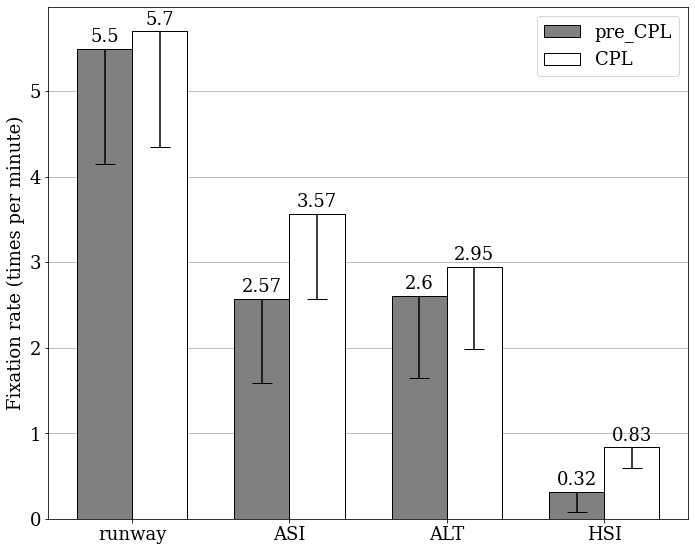

In [45]:
import matplotlib 

font = {'family' : 'serif',
        'size'   : 18}
matplotlib.rc('font', **font)

# cols = ["outside_fix_dur", "ASI_fix_dur", "ALT_fix_dur", "HSI_fix_dur"]
# cols = ["duration_average_runway", "duration_average_asi", "duration_average_alt", "duration_average_hsi"]
cols = ["fix_rate_runway", "fix_rate_asi", "fix_rate_alt", "fix_rate_hsi"]

pre_cpl = []
pre_cpl_std = []
cpl = []
cpl_std = []

pre_cpl_df = df_dwell[df_dwell["group"] == 1]
cpl_df = df_dwell[df_dwell["group"] == 2]

for col in cols:
    pre_cpl.append(np.mean(pre_cpl_df[col]))
    cpl.append(np.mean(cpl_df[col]))
    pre_cpl_std.append(np.std(pre_cpl_df[col]))
    cpl_std.append(np.std(cpl_df[col]))
    
# labels = [col.split("_")[-1] for col in cols]
labels = ["runway", "ASI", "ALT", "HSI"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
print(pre_cpl_std)
fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x - width/2, pre_cpl, width, label='pre_CPL', yerr=[pre_cpl_std, [0,0,0,0]], capsize = 10, fc=(0.5,0.5,0.5,1), ec=(0,0,0,1))
rects2 = ax.bar(x + width/2, cpl, width, label='CPL', yerr=[pre_cpl_std, [0,0,0,0]], capsize = 10, fc=(1,1,1,1), ec=(0,0,0,1))

# bars = [rects1, rects2]
# # patterns = ('-', '+', 'x', '\\', '*', 'o', 'O', '.')
# patterns = ('-', '\\')
# for bar, pattern in zip(bars, patterns):
#     bar.set_hatch(pattern)

# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Mean fixation duration (s)')
ax.set_ylabel('Fixation rate (times per minute)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(np.round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

ax.grid(axis='y')
ax.set_axisbelow(True)
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig("b.png")

In [28]:
df_dwell[cols]

,duration_percentage_runway,duration_percentage_asi,duration_percentage_alt,duration_percentage_hsi
0,0.744033,0.080266,0.125761,0.000000
1,0.617805,0.105859,0.167247,0.003953
2,0.701955,0.111441,0.103173,0.011363
3,0.466128,0.082198,0.243739,0.000000
4,0.648992,0.115301,0.092202,0.014047
5,0.726277,0.123815,0.048556,0.011535
6,0.759193,0.111613,0.044123,0.009620
7,0.647703,0.121311,0.083999,0.013325
8,0.779150,0.081104,0.036443,0.003521
9,0.640024,0.206546,0.094950,0.011731


[[67.6803896  64.64242373]
 [10.36564133 15.00919593]
 [10.50268907 10.37748719]
 [ 1.7484831   2.20143342]
 [ 9.70279689  7.76945972]]


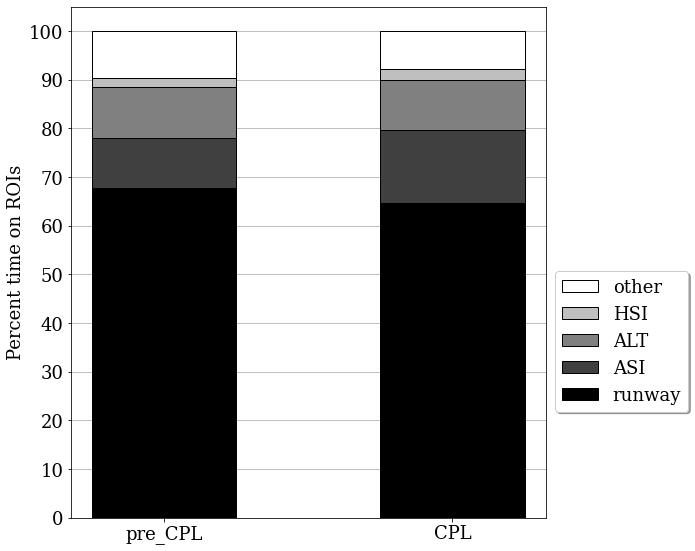

In [38]:
import matplotlib 

font = {'family' : 'serif',
        'size'   : 18}
matplotlib.rc('font', **font)

cols = ["duration_percentage_runway", "duration_percentage_asi", "duration_percentage_alt", "duration_percentage_hsi"]
pre_cpl = []
cpl = []

pre_cpl_df = df_dwell[df_dwell["group"] == 1]
cpl_df = df_dwell[df_dwell["group"] == 2]

for col in cols:
    pre_cpl.append(np.mean(pre_cpl_df[col])*100)
    cpl.append(np.mean(cpl_df[col])*100)

cpl[3] = cpl[3]
pre_cpl[3] = pre_cpl[3]+1

    
pre_cpl.append(100 - sum(pre_cpl))
cpl.append(100 - sum(cpl))

data = np.array([pre_cpl, cpl]).T
print(data)
ind = np.arange(2)    # the x locations for the groups
width = 0.1       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots(figsize = (10, 8))

ind = [0.3, 0.5]
p1 = ax.bar(ind, data[0], width, label='runway', fc=(0,0,0,1), ec=(0,0,0,1))
p2 = ax.bar(ind, data[1], width, bottom=data[0], label='ASI', fc=(0.25,0.25,0.25,1), ec=(0,0,0,1))
p3 = ax.bar(ind, data[2], width, bottom=[i+j for i,j in zip(data[0], data[1])], label='ALT', fc=(0.5,0.5,0.5,1), ec=(0,0,0,1))
p4 = ax.bar(ind, data[3], width, bottom=[i+j+k for i,j,k in zip(data[0], data[1], data[2])], label='HSI', fc=(0.75,0.75,0.75,1), ec=(0,0,0,1))
p5 = ax.bar(ind, data[4], width, bottom=[i+j+k+l for i,j,k,l in zip(data[0], data[1], data[2], data[3])], label='other', fc=(1,1,1,1), ec=(0,0,0,1))

ax.grid(axis='y')
ax.set_ylabel('Percent time on ROIs')
ax.set_xticks((0.3, 0.5))
ax.set_xticklabels(['pre_CPL', 'CPL'])
ax.set_yticks(np.arange(0, 101, 10))
ax.set_axisbelow(True)

handles, labels = ax.get_legend_handles_labels()
order = [4,3,2,1,0]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
plt.tight_layout()

# ax.legend(loc='best',bbox_to_anchor=(1, 0.5),
#           ncol=1, fancybox=True, shadow=True)

fig.savefig("a.png")

In [43]:
document = mongo.find({"pID":"008", "trial":2})

In [44]:
df_data = pd.DataFrame(document[0]["data"])
df_data = fixation.merge_consecutive_fixations_in_same_roi(df_data)
transitions, L = pair_transition_analysis.encode_transition(df_data["roi"], "fix")

In [46]:
df_data

,start,end,duration,x,y,roi
0,0.844064,1.086056,0.241992,828.919045,474.554725,alt
1,1.248089,1.702086,0.453997,676.526952,463.657114,asi
2,1.833112,1.995101,0.161989,818.971658,460.633385,alt
3,2.109133,2.287117,0.177984,758.725989,467.570015,unknown
4,2.423180,3.049156,0.547973,836.116290,492.511651,alt
...,...,...,...,...,...,...
57,121.179180,121.930218,0.751038,830.942513,497.288216,alt
58,124.506349,124.782364,0.276015,677.324457,502.254142,asi
59,127.492520,127.914526,0.422006,832.589002,482.323075,alt
60,137.391005,137.828030,0.437025,679.782183,496.386210,asi


In [45]:
transitions.replace("Z", "")

'ASAAXAAXAXSXAXAXSAXAXXXASXASXXXAXXAXSXSXXASXSXASASX'

# n-gram analysis

In [22]:
documents = mongo.find({})
d = defaultdict(list)

subseqcount_group = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for document in documents:
    print("trial: {}, group: {}, pID: {}".format(document["trial"], document["group"], document["pID"]))
    if document["trial"] == 4:
        continue
        
    d['pID'].append(document["pID"])
    d['group'].append(document["group"])
    d['trial'].append(document["trial"])
    
    d_data = document["data"]
    df_data = pd.DataFrame(d_data)
    df_data = fixation.merge_consecutive_fixations_in_same_roi(df_data)
    transitions, L = pair_transition_analysis.encode_transition(df_data["roi"], "fix")
    
    group = document["group"]
    rating = document["rating"]

    for ngram_length in range(3,5):
        subseqcount = defaultdict(int)
        
        transitions.replace("Z","")

        for i in range(len(transitions)-ngram_length + 1):
            substring = transitions[i:i+ngram_length]
            subseqcount[substring] += 1
            subseqcount_group[rating][ngram_length][substring] += 1
            
        sorted_subseqcount = {k: v for k, v in sorted(subseqcount.items(), key=lambda item: item[1], reverse=True)}
        more_than_2_time_seq = {k: v for k, v in subseqcount.items() if v >= 2}
        count_of_most_seq = 0
        N_unique_seq = 0
#         print(document["group"], document["pID"])
        if len(subseqcount.values())>0:
            
            count_of_most_seq = max(subseqcount.values())/sum(subseqcount.values())
            N_unique_seq = len(subseqcount.keys())

        N_unique_seq_more_than_2_times = 0
        if len(more_than_2_time_seq.values())>0:
            N_unique_seq_more_than_2_times = len(more_than_2_time_seq.keys())
            
        sum_pattern_count = sum(more_than_2_time_seq.values())
        freq_pattern = np.array(list(subseqcount.values()))/sum_pattern_count
        ss_freq = sum(np.square(freq_pattern))

        d["N_unique_seq_{}".format(ngram_length)].append(N_unique_seq)
        d["ss_freq_{}".format(ngram_length)].append(ss_freq)
        d["count_of_most_seq_{}".format(ngram_length)].append(count_of_most_seq)
        d["N_unique_seq_more_than_2_times_{}".format(ngram_length)].append(N_unique_seq_more_than_2_times)
        d["mean_repetition_{}".format(ngram_length)].append(np.mean(list(more_than_2_time_seq.values())))
        

trial: 1, group: 2, pID: 001
trial: 1, group: 2, pID: 002
trial: 1, group: 1, pID: 003
trial: 1, group: 1, pID: 004
trial: 1, group: 2, pID: 005
trial: 1, group: 2, pID: 006
trial: 1, group: 1, pID: 007
trial: 1, group: 1, pID: 008
trial: 1, group: 1, pID: 010
trial: 1, group: 2, pID: 011
trial: 1, group: 2, pID: 014
trial: 1, group: 2, pID: 016
trial: 1, group: 2, pID: 019
trial: 1, group: 2, pID: 020
trial: 1, group: 2, pID: 021
trial: 1, group: 2, pID: 022
trial: 1, group: 1, pID: 023
trial: 1, group: 2, pID: 025
trial: 1, group: 1, pID: 027
trial: 1, group: 1, pID: 029
trial: 1, group: 1, pID: 032
trial: 2, group: 2, pID: 001
trial: 2, group: 2, pID: 002
trial: 2, group: 1, pID: 003
trial: 2, group: 1, pID: 004
trial: 2, group: 2, pID: 005
trial: 2, group: 2, pID: 006
trial: 2, group: 1, pID: 007
trial: 2, group: 1, pID: 008
trial: 2, group: 2, pID: 009
trial: 2, group: 1, pID: 010
trial: 2, group: 2, pID: 011
trial: 2, group: 2, pID: 014
trial: 2, group: 2, pID: 015
trial: 2, grou

In [37]:
subseqcount_group

defaultdict(<function __main__.<lambda>()>,
            {'001': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {3: {'XSX': 29, 'AXS': 10, 'XAX': 5, 'SXA': 4},
                          4: {'XSXS': 25}}),
             '002': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {3: {'XSX': 17, 'XAX': 10, 'XAS': 9, 'SAX': 9},
                          4: {'SXSX': 12, 'XSAX': 7}}),
             '003': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {3: {'XSX': 13, 'XAX': 12, 'AXS': 3, 'SXA': 2},
                          4: {'AXAX': 10, 'XSXS': 9}}),
             '004': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {3: {'XAX': 17,
                           'SXA': 13,
                           'XSX': 9,
                           'AXS': 7,
                           'SAS': 3},
                          4: {'XASX': 9, 'XAXA': 9}}),
      

# dominance level

In [2]:
def filter_subseq(dict_subseqcount):
    d = dict_subseqcount
    d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
    d = {k: v for k, v in d.items() if v >= 2}
    list_subseq = list(d.keys())
    processed = []
    exclude = []
    for i, p in enumerate(list_subseq):
        if p in processed:
            continue
            
        processed.append(p)
            
        if "Z" in p:
            exclude.append(p)
            continue

        for j, p_next in enumerate(list_subseq[i+1:]):
            if p_next in ''.join(i for i, _ in itertools.groupby(p*2)):
                exclude.append(p_next)
                
        if len(p) > 3:
            for j, p_next in enumerate(list_subseq[i+1:]):
                if p[1:] in p_next or p[:-1] in p_next:
                    exclude.append(p_next)
                    
        processed.append(p)

    include = [v for v in list_subseq if v not in exclude]
    d_res = {}
    for k in include:
        d_res[k] = d[k]
    
    return d_res

def dominance_level(dict_subseqcount):
    d = dict_subseqcount
    counts = list(d.values())
    counts = np.array(counts)
    prob = counts/sum(counts)
    print(prob)
    max_prob = max(prob)
    D = np.square(max_prob - prob).mean()
    return D

In [45]:
documents = mongo.find({})
d = defaultdict(list)

subseqcount_group = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))

for document in documents:
    print("trial: {}, group: {}, pID: {}".format(document["trial"], document["group"], document["pID"]))
    if document["trial"] == 4:
        continue
        
    d['pID'].append(document["pID"])
    d['group'].append(document["group"])
    d['rating'].append(document["rating"])
    d['trial'].append(document["trial"])
    
    d_data = document["data"]
    df_data = pd.DataFrame(d_data)
    df_data = fixation.merge_consecutive_fixations_in_same_roi(df_data)
    transitions, L = pair_transition_analysis.encode_transition(df_data["roi"], "fix")
    
    transitions.replace("Z","")
    
    group = document["group"]
    rating = document["rating"]
    pID = document["pID"]
    
    d_dwell = bulk_run.get_dwell_stat(df_data)
    for k in roi_config.encode_table.keys():
        d["duration_average_{}".format(k)].append(d_dwell.get("duration_average_{}".format(k), 0))
        d["duration_var_{}".format(k)].append(d_dwell.get("duration_var_{}".format(k), 0))
        

    for ngram_length in range(3,5):
        subseqcount = defaultdict(int)

        for i in range(len(transitions)-ngram_length + 1):
            substring = transitions[i:i+ngram_length]
            subseqcount[substring] += 1
        
        filtered_subseq = filter_subseq(subseqcount)
        subseqcount_group[pID][ngram_length] = filtered_subseq
        D = dominance_level(filtered_subseq)
        d[ngram_length].append(D)
        
        subseqcount = {k: v for k, v in subseqcount.items() if v >= 2}
    

#         sorted_subseqcount = {k: v for k, v in sorted(subseqcount.items(), key=lambda item: item[1], reverse=True)}
#         more_than_2_time_seq = {k: v for k, v in subseqcount.items() if v >= 2}

trial: 1, group: 2, pID: 001
[0.59090909 0.15909091 0.11363636 0.09090909 0.04545455]
[0.90909091 0.09090909]
trial: 1, group: 2, pID: 002
[0.34 0.3  0.22 0.14]
[0.43478261 0.34782609 0.2173913 ]
trial: 1, group: 1, pID: 003
[0.31818182 0.27272727 0.22727273 0.18181818]
[0.33333333 0.25       0.25       0.16666667]
trial: 1, group: 1, pID: 004
[0.31428571 0.22857143 0.2        0.17142857 0.08571429]
[0.3  0.25 0.25 0.2 ]
trial: 1, group: 2, pID: 005
[0.70588235 0.17647059 0.11764706]
[1.]
trial: 1, group: 2, pID: 006
[0.40625 0.34375 0.125   0.125  ]
[0.5 0.5]
trial: 1, group: 1, pID: 007
[0.3255814  0.27906977 0.23255814 0.1627907 ]
[1.]
trial: 1, group: 1, pID: 008
[0.42857143 0.28571429 0.28571429]
[0.5 0.5]
trial: 1, group: 2, pID: 009
[0.22857143 0.22857143 0.2        0.2        0.14285714]
[0.5 0.5]
trial: 1, group: 1, pID: 010
[0.43478261 0.2173913  0.17391304 0.17391304]
[1.]
trial: 1, group: 2, pID: 011
[0.47619048 0.14285714 0.14285714 0.14285714 0.0952381 ]
[0.53846154 0.153

In [57]:
subseqcount_group

defaultdict(<function __main__.<lambda>()>,
            {'001': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {3: {'XSX': 27, 'AXS': 9, 'XAX': 6, 'SXA': 4},
                          4: {'XSXS': 23, 'XSAX': 5}}),
             '002': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {3: {'XSX': 19, 'SAX': 10, 'XAX': 9, 'XAS': 8},
                          4: {'SXSX': 12, 'XSAX': 8, 'XASX': 6}}),
             '003': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {3: {'XAX': 14, 'XSX': 11, 'SXA': 3},
                          4: {'AXAX': 11, 'XSXS': 7}}),
             '004': defaultdict(<function __main__.<lambda>.<locals>.<lambda>()>,
                         {3: {'XAX': 17,
                           'SXA': 12,
                           'XSX': 11,
                           'AXS': 8,
                           'ASA': 6},
                          4: {'XAXA': 11, 'XASX':

In [118]:
pID = "025"
document = mongo.find({"pID": pID, "trial":2})
df_data = pd.DataFrame(document[0]["data"])
df_data = fixation.merge_consecutive_fixations_in_same_roi(df_data)
transitions, L = pair_transition_analysis.encode_transition(df_data["roi"], "fix")

In [119]:
df_data["enc_roi"] = list(transitions)
subseq = subseqcount_group[pID][3]

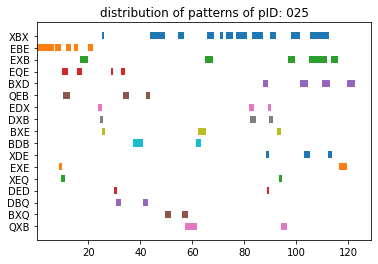

In [120]:
fig, ax = plt.subplots()
ax.invert_yaxis()

for k in subseq.keys():
    idx = [match.start() for match in re.finditer(k, transitions)]
    starts = [df_data.iloc[i]["start"] for i in idx]
    widths = [df_data.iloc[i+2]["end"]-df_data.iloc[i]["start"] for i in idx]    
    ax.barh(k, widths, left=starts, height=0.6)
plt.title(f"distribution of patterns of pID: {pID}")
plt.show()

In [139]:
dominance_level(subseqcount_group["002"][3])

[0.23809524 0.14285714 0.12698413 0.12698413 0.07936508 0.06349206
 0.06349206 0.04761905 0.04761905 0.03174603 0.03174603]


0.025241072860120475

In [46]:
df_res = pd.DataFrame(d).sort_values(["pID", "trial", "group","rating"]).dropna().reset_index().drop(columns=["index"])

In [30]:
df_res

,pID,group,rating,trial,duration_average_rpmleft,duration_var_rpmleft,duration_average_asi,duration_var_asi,duration_average_alt,duration_var_alt,duration_average_runway,duration_var_runway,duration_average_unknown,duration_var_unknown,3,4
0,001,2,1,1,0,0,0.583667,0.233402,0.481033,0.095874,1.283531,3.022038,0.487560,0.161742,0.206633,0.341210
1,001,2,1,2,0,0,0.480460,0.131608,0.447957,0.089926,1.298824,2.366330,0.592496,0.298680,0.169488,0.000000
2,002,2,1,1,0,0,0.482793,0.192132,0.519271,0.150758,1.310045,3.510496,0.621238,0.612077,0.023900,0.000000
3,002,2,1,2,0,0,0.394256,0.076200,0.426502,0.160380,1.408467,3.988215,0.514178,0.137027,0.021852,0.034626
4,003,1,0,1,0,0,0.728824,0.362106,0.591392,0.114261,2.086832,13.247455,0.222943,0.027153,0.040680,0.046875
5,003,1,0,2,0,0,0.752342,0.086271,0.896562,0.222284,2.571769,12.893420,0.343690,0.047397,0.061667,0.001385
6,004,1,0,1,0,0,0.600167,0.206115,0.541243,0.162739,1.076811,3.054949,0.287489,0.040091,0.017274,0.031250
7,004,1,0,2,0,0,0.497486,0.172151,0.458610,0.054101,1.200114,4.122452,0.258014,0.054436,0.031320,0.000000
8,005,2,1,1,0,0,0.539304,0.166833,0.578028,0.085945,1.571690,4.887671,0.592647,0.175069,0.213542,0.000000
9,005,2,1,2,0,0,0.726644,0.157825,0.587092,0.122166,1.995784,3.922883,0.316533,0.073117,0.181994,0.212665


In [31]:
df_1[4]

4     0.086250
5     0.024691
6     0.091223
7     0.042160
12    0.000000
13    0.123961
18    0.000000
19    0.000000
20    0.144558
21    0.222222
22    0.188802
23    0.140138
24    0.080000
31    0.000000
32    0.000000
35    0.000000
36    0.182507
37    0.199748
38    0.292388
39    0.209343
43    0.125000
47    0.000000
48    0.180000
Name: 4, dtype: float64

In [47]:
exclude_cols = ["index", "pID", "trial", "null_percent", "rating"]
cols = [c for c in list(df_res.columns) if c not in exclude_cols]

df_1 = df_res[df_res["rating"] == 0].loc[:,cols]
df_2 = df_res[df_res["rating"] == 1].loc[:,cols]

df_test = hypothesis_testing.hypothesis_test([df_1, df_2])
df_test

Found 2 groups
Number of samples in group 0:24
Number of samples in group 1:26
group: group 1: 24, group 2: 26
duration_average_rpmleft: group 1: 0, group 2: 0
duration_var_rpmleft: group 1: 0, group 2: 0
duration_average_asi: group 1: 24, group 2: 26
duration_var_asi: group 1: 24, group 2: 26
duration_average_alt: group 1: 24, group 2: 26
duration_var_alt: group 1: 24, group 2: 26
duration_average_runway: group 1: 24, group 2: 26
duration_var_runway: group 1: 24, group 2: 26
duration_average_unknown: group 1: 24, group 2: 26
duration_var_unknown: group 1: 24, group 2: 26
3: group 1: 24, group 2: 26
4: group 1: 18, group 2: 19
test: t, effect size: cohen


c:\users\work\anaconda3\envs\kia\lib\site-packages\numpy\core\fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\work\anaconda3\envs\kia\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\users\work\anaconda3\envs\kia\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
c:\users\work\anaconda3\envs\kia\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
c:\users\work\anaconda3\envs\kia\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,ROI,levene: l-value,levene: p-value,t: t-value,t: p-value,ES (cohen)
0,group,3.054545,0.086906,-3.046036,0.003760,0.862239
1,duration_average_rpmleft,NaN,NaN,NaN,NaN,NaN
2,duration_var_rpmleft,NaN,NaN,NaN,NaN,NaN
3,duration_average_asi,0.333336,0.566400,0.149856,0.881506,0.042420
4,duration_var_asi,1.459763,0.232887,-1.215990,0.229935,0.344209
5,duration_average_alt,1.736032,0.193897,2.056567,0.045186,0.582151
6,duration_var_alt,0.625450,0.432919,1.077927,0.286454,0.305128
7,duration_average_runway,1.212158,0.276396,1.498697,0.140501,0.424235
8,duration_var_runway,2.166493,0.147574,1.479775,0.145467,0.418879
9,duration_average_unknown,1.664819,0.203135,-0.279340,0.781184,0.079073


In [48]:
fixation_metrics = {"max_dist": 5, "min_dur": 10, "null_percent":0.2}

In [49]:
test_on = "rating"
test_metrics = f"N samples in group 1: {len(df_1)}/ N samples in group 2: {len(df_2)}"

In [50]:
test_result = df_test[["ROI", "t: p-value"]]
str_test_result = ""
for r in test_result.values:
    str_test_result+= f"{r[0]}: {r[1]}\n"
print(str_test_result)

group: 0.003760401085907506
duration_average_rpmleft: nan
duration_var_rpmleft: nan
duration_average_asi: 0.8815059566185144
duration_var_asi: 0.2299349907597268
duration_average_alt: 0.04518562046000535
duration_var_alt: 0.286453754067011
duration_average_runway: 0.14050082749090387
duration_var_runway: 0.14546725741142183
duration_average_unknown: 0.7811839647264662
duration_var_unknown: 0.474829180239993
3: 0.7613054306947358
4: 0.9474802327758932



In [51]:
utils.log_to_airtable({"test": test_on, "fixation metrics":str(fixation_metrics),
                       "test metrics": test_metrics,"test result": str_test_result})

{'test': 'rating', 'fixation metrics': "{'max_dist': 5, 'min_dur': 10, 'null_percent': 0.2}", 'test metrics': 'N samples in group 1: 24/ N samples in group 2: 26', 'test result': 'group: 0.003760401085907506\nduration_average_rpmleft: nan\nduration_var_rpmleft: nan\nduration_average_asi: 0.8815059566185144\nduration_var_asi: 0.2299349907597268\nduration_average_alt: 0.04518562046000535\nduration_var_alt: 0.286453754067011\nduration_average_runway: 0.14050082749090387\nduration_var_runway: 0.14546725741142183\nduration_average_unknown: 0.7811839647264662\nduration_var_unknown: 0.474829180239993\n3: 0.7613054306947358\n4: 0.9474802327758932\n', 'Time': '20:53:32 21-04-2022'}


In [85]:
hypothesis_testing.hypothesis_test_group(df_res, trial = 1)

test between group 1 and group 2 in trial 1
Number of samples in group 1: 9
Number of samples in group 2: 15
test: t, effect size: cohen


,ROI,levene: l-value,levene: p-value,t: t-value,t: p-value,ES (cohen)
0,rating,0.312500,0.581797,-2.236068,0.035812,0.942809
1,duration_average_asi,1.753187,0.199070,0.725821,0.475600,0.306033
2,duration_var_asi,1.585786,0.221127,0.808049,0.427714,0.340703
3,duration_average_alt,0.143874,0.708096,-1.417089,0.170463,0.597497
4,duration_var_alt,2.911512,0.102028,-2.149519,0.042850,0.906317
5,duration_average_runway,0.066746,0.798537,0.498183,0.623299,0.210053
6,duration_var_runway,0.344880,0.563005,0.574022,0.571776,0.242029
7,duration_average_unknown,1.274844,0.271022,-0.422275,0.676923,0.178047
8,duration_var_unknown,0.054818,0.817047,0.207195,0.837763,0.087361
9,3,1.823791,0.190592,-0.733465,0.471019,0.309256


## auto  gen

In [38]:
for i in range(3,7):
    print("N_unique_seq_{}: g1: {} +- {}, g2: {}+-{}".format(i, g1["ss_freq_{}".format(i)].mean()/i,  g1["ss_freq_{}".format(i)].std()/i,
                                                    g2["ss_freq_{}".format(i)].mean()/i,  g2["ss_freq_{}".format(i)].std()/i))

N_unique_seq_3: g1: 0.027653412274385655 +- 0.009005813508580431, g2: 0.028814446902841826+-0.012806201196708264
N_unique_seq_4: g1: 0.023614709936905676 +- 0.011328297820905105, g2: 0.025879625659861995+-0.013766783601425083
N_unique_seq_5: g1: 0.03814995842196857 +- 0.02077276357501478, g2: 0.03743423457906004+-0.02096056315947464
N_unique_seq_6: g1: 0.15008683123233982 +- 0.1630826095427169, g2: 0.09298296311631671+-0.09326097722586459


In [84]:
for i in range(3,7):
    print("N_unique_seq_{}: g1: {} +- {}, g2: {}+-{}".format(i, g1["N_unique_seq_more_than_2_times_{}".format(i)].mean()/i,  g1["N_unique_seq_more_than_2_times_{}".format(i)].std()/i,
                                                            g2["N_unique_seq_more_than_2_times_{}".format(i)].mean()/i,  g2["N_unique_seq_more_than_2_times_{}".format(i)].std()/i))

N_unique_seq_3: g1: 7.458333333333333 +- 2.8224581203748342, g2: 7.533333333333334+-2.1887156486113475
N_unique_seq_4: g1: 5.21875 +- 2.1689262484991443, g2: 4.933333333333334+-1.8719419506669182
N_unique_seq_5: g1: 2.8 +- 1.397957694025722, g2: 2.7466666666666666+-1.1963436359332946
N_unique_seq_6: g1: 1.125 +- 0.6346477588219924, g2: 1.5+-0.7993052538854531


In [13]:
from scipy import stats

t_score = stats.ttest_ind_from_stats(mean1=0.27, std1=0.15, nobs1=9, \
                               mean2=0.53, std2=0.24, nobs2=15, \
                               equal_var=True)
t_score


Ttest_indResult(statistic=-2.9121880804746105, pvalue=0.00807614408733926)

In [16]:
import numpy as np

num_samples = 15
desired_mean = 0.53
desired_std_dev = 0.24

samples = np.random.normal(loc=0.0, scale=desired_std_dev, size=num_samples)

actual_mean = np.mean(samples)
actual_std = np.std(samples)
print("Initial samples stats   : mean = {:.4f} stdv = {:.4f}".format(actual_mean, actual_std))

zero_mean_samples = samples - (actual_mean)

zero_mean_mean = np.mean(zero_mean_samples)
zero_mean_std = np.std(zero_mean_samples)
print("True zero samples stats : mean = {:.4f} stdv = {:.4f}".format(zero_mean_mean, zero_mean_std))

scaled_samples = zero_mean_samples * (desired_std_dev/zero_mean_std)
scaled_mean = np.mean(scaled_samples)
scaled_std = np.std(scaled_samples)
print("Scaled samples stats    : mean = {:.4f} stdv = {:.4f}".format(scaled_mean, scaled_std))

final_samples = scaled_samples + desired_mean
final_mean = np.mean(final_samples)
final_std = np.std(final_samples)


Initial samples stats   : mean = 0.0855 stdv = 0.2626
True zero samples stats : mean = 0.0000 stdv = 0.2626
Scaled samples stats    : mean = 0.0000 stdv = 0.2400


In [17]:
final_samples

array([0.41396197, 0.71746627, 0.11414781, 1.00174642, 0.41069279,
       0.75372789, 0.33264052, 0.44070235, 0.78364003, 0.56598989,
       0.73486458, 0.30423746, 0.52947094, 0.67573176, 0.17097932])

In [111]:
x41 = []
x42 = []

In [151]:
x31 = [9, 3, 4, 8, 7, 11, 3, 9, 8]
x32 = [5, 1,6,5,6,3,4,6,8,2,6,7,5,5,3]
print("g1 M, SD ", np.mean(x31), np.std(x31))
print("g2 M, SD", np.mean(x32), np.std(x32))
print(stats.ttest_ind(x31, x32))
print(stats.levene(x31, x32))
print("ES", anova.EffectSize(x31,x32))

g1 M, SD  6.888888888888889 2.7261875880856214
g2 M, SD 4.8 1.833030277982336
Ttest_indResult(statistic=2.145653095743924, pvalue=0.043191868844187596)
LeveneResult(statistic=1.5168211120064468, pvalue=0.23110420433276924)
ES 0.17305131218174702


In [152]:
x41 = [7, 0, 3, 5, 6, 8, 1, 6, 5]
x42 = [4, 0, 3, 0, 2, 4, 0, 6, 1, 2, 3, 4, 5, 4, 0]
print("g1 M, SD ", np.mean(x41), np.std(x41))
print("g2 M, SD", np.mean(x42), np.std(x42))
print(stats.ttest_ind(x41, x42))
print(stats.levene(x41, x42))
print("ES", anova.EffectSize(x41,x42))

g1 M, SD  4.555555555555555 2.543449587168799
g2 M, SD 2.533333333333333 1.9275776393067947
Ttest_indResult(statistic=2.107335731333615, pvalue=0.0467145241481979)
LeveneResult(statistic=0.33266129032258057, pvalue=0.5699513508525138)
ES 0.1679545685021803


In [155]:
df_res[["pID", "group"]]

,pID,group
0,003,1
1,004,1
2,007,1
3,010,1
4,023,1
5,027,1
6,029,1
7,032,1
8,001,2
9,002,2


In [145]:
np.array(x41.extend(x42))

array(None, dtype=object)

In [153]:
pd.DataFrame({"unique_3": x31 + x32,
              "unique_4":x41 + x42})

,unique_3,unique_4
0,9,7
1,3,0
2,4,3
3,8,5
4,7,6
5,11,8
6,3,1
7,9,6
8,8,5
9,5,4


In [39]:
def ss_frequencies(arr):
    arr_freq = np.array(arr)/sum(arr)
    ss_freq = sum(np.square(arr_freq))
    return ss_freq

In [42]:
x31 = [21, 7, 5, 5, 4, 4, 3]
x32 = [15, 12, 8, 5, 7, 5, 4]

In [44]:
print(ss_frequencies(x31), ss_frequencies(x32))

0.2419825072886297 0.17474489795918366


In [9]:
import anova

In [10]:
# dominance 3
x31 = [0.1235326 , 0.05465944, 0.00951633, 0.23213826, 0.43568024,
       0.18887091, 0.26745887, 0.43291954, 0.2352238 ]
x32 = [0.49786056, 0.30533778, 0.5054069 , 0.40756063, 0.25322919,
       0.18045012, 0.33435727, 0.44736973, 0.52763621, 0.26127286,
       0.47002627, 0.25161033, 0.13575451, 0.48529045, 0.18683719]

print("g1 M, SD ", np.mean(x31), np.std(x31))
print("g2 M, SD", np.mean(x32), np.std(x32))
print(stats.ttest_ind(x31, x32))
print(stats.levene(x31, x32))
print("ES", anova.EffectSize(x31,x32))

g1 M, SD  0.21999999888888888 0.13999999914642233
g2 M, SD 0.35 0.13000000003406395
Ttest_indResult(statistic=-2.205627857134636, pvalue=0.03815799437738026)
LeveneResult(statistic=0.055720474829801865, pvalue=0.8155761870353176)
ES 0.18108436639987857


In [18]:
# dominance 4
x41 = [0.33987412, 0.11685512, 0.54621883, 0.02076503, 0.26887855,
       0.14973279, 0.24819192, 0.39108929, 0.34839436]
x42 = [0.41396197, 0.71746627, 0.11414781, 1.00174642, 0.41069279,
       0.75372789, 0.33264052, 0.44070235, 0.78364003, 0.56598989,
       0.73486458, 0.30423746, 0.52947094, 0.67573176, 0.17097932]

print("g1 M, SD ", np.mean(x41), np.std(x41))
print("g2 M, SD",  np.mean(x42), np.std(x42))
print(stats.ttest_ind(x41, x42))
print(stats.levene(x41, x42))
print("ES", anova.EffectSize(x41,x42))

g1 M, SD  0.2700000011111111 0.1500000010631649
g2 M, SD 0.53 0.2400000001832111
Ttest_indResult(statistic=-2.8006930854137266, pvalue=0.010419153941901179)
LeveneResult(statistic=2.6290047895323547, pvalue=0.11917299212713069)
ES 0.2628304796979627


In [68]:
#exp
x32 =[330.50590937, 186.74702417, 102.66444388, 245.99720662,
       148.09773501, 242.65979636, 282.06391234, 238.30040571,
       418.22832453, 188.05100993, 182.14450097, 317.49768601,
       191.98208521, 204.40091383, 311.65904607]

x31 =[138.15663438,  30.60022381,  60.2892445 , 135.12954972,
        -3.00240379,  66.66649826, -10.12049143,  80.6838514 ,
        77.59689314]

print("g1 M, SD ", np.mean(x31), np.std(x31))
print("g2 M, SD", np.mean(x32), np.std(x32))
print(stats.ttest_ind(x32, x31))
print(stats.levene(x31, x32))
print("ES", anova.EffectSize(x31,x32))

g1 M, SD  63.99999999888889 49.59999999876028
g2 M, SD 239.40000000066667 78.59999999843619
Ttest_indResult(statistic=5.7585182246344475, pvalue=8.584359844006004e-06)
LeveneResult(statistic=1.6684783510562224, pvalue=0.20986852039018203)
ES 0.601164108736512
